#TASK #1: UNDERSTAND THE PROBLEM STATEMENT/BUSINESS CASE

- In this hands-on project, we will train a multiple linear regression model to predict the price of used cars.
- This project can be used by car dealerships to predict used car prices and understand the key factors that contribute to used car prices.
- Features (inputs): 
    - Make 
    - Model
    - Type
    - Origin 
    - Drivetrain
    - Invoice
    - EngineSize
    - Cylinders
    - Horsepower
    - MPG_City
    - MPG_Highway
    - Weight
    - Wheelbase
    - Length
- Outputs: MSRP (Price)



#TASK #2: IMPORT KEY LIBRARIES/DATASETS, PERFORM EDA AND PREPARE THE DATA FOR TRAINING

In [1]:
# Import Numpy and check the version
import numpy as np
print(np.__version__)

1.26.4


In [2]:
# Import Numpy and check the version
import pandas as pd
print(pd.__version__)

2.2.3


In [3]:
# Updgrade Numpy version
!pip3 install numpy --upgrade

  Using cached numpy-2.1.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.1.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires nvidia-ml-py3==7.352.0, which is not installed.
amazon-sagemaker-jupyter-ai-q-developer 1.0.9 requires numpy<=2.0.1, but you have numpy 2.1.2 which is incompatible.
autogluon-common 1.1.1 requires numpy<1.29,>=1.21, but you have numpy 2.1.2 which is incompatible.
autogluon-core 1.1.1 requires numpy<1.29,>=1.21, but you have numpy 2.1.2 which is incompatible.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-le

In [4]:
# Updgrade Pandas version
!pip3 install pandas --upgrade

In [5]:
!pip install seaborn

In [6]:
#!pip install --upgrade pip setuptools wheel
#!pip install bertopic --no-cache-dir
#!pip uninstall hdbscan -y
#!pip install hdbscan --no-cache-dir --no-binary :all: --no-build-isolation
!pip install bertopic

  Using cached bertopic-0.16.4-py3-none-any.whl.metadata (23 kB)
  Using cached hdbscan-0.8.39-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached sentence_transformers-3.2.1-py3-none-any.whl.metadata (10 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached transformers-4.45.2-py3-none-any.whl.metadata (44 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached tokenizers-0.20.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached bertopic-0.16.4-py3-none-any.whl (143 kB)
Using cached hdbscan-0.8.39-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
Using cached sentence_transformers-3.2.1-py3-none-any.whl (255 kB)
Using cached 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Interactive Data Visualization

In [8]:
# Read the CSV file 
car_df = pd.read_csv("used_car_price.csv")

In [9]:
# Load the top 6 instances
car_df.head(6)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100,3.5,6,225,18,24,3893,115,197


In [10]:
# Load the bottom 6 instances 
car_df.tail(6)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
422,Volvo,S80 2.5T 4dr,Sedan,Europe,All,37885,2.5,5,194,20,27,3691,110,190
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,35145,2.5,5,208,20,27,3823,109,186


In [11]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [12]:
# Check the shape of the dataframe
car_df.shape

(428, 14)

In [13]:
car_df.isnull()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,False,False,False,False,False,False,False,False,False,False,False,False,False,False
424,False,False,False,False,False,False,False,False,False,False,False,False,False,False
425,False,False,False,False,False,False,False,False,False,False,False,False,False,False
426,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Check if any missing values are present in the dataframe
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [15]:
car_df = car_df.dropna()

In [16]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders        int64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

<Axes: >

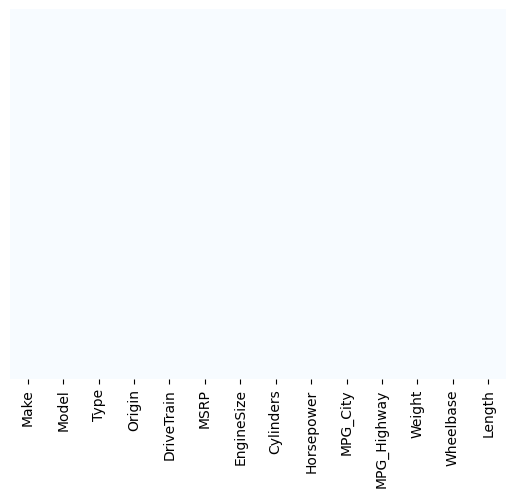

In [17]:
# check if there are any Null values
sns.heatmap(car_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [18]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders        int64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

<Axes: xlabel='Horsepower', ylabel='MSRP'>

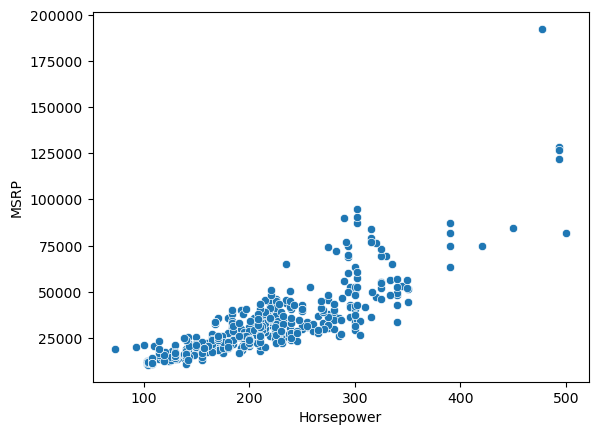

In [19]:
sns.scatterplot(x = 'Horsepower', y = 'MSRP', data = car_df)

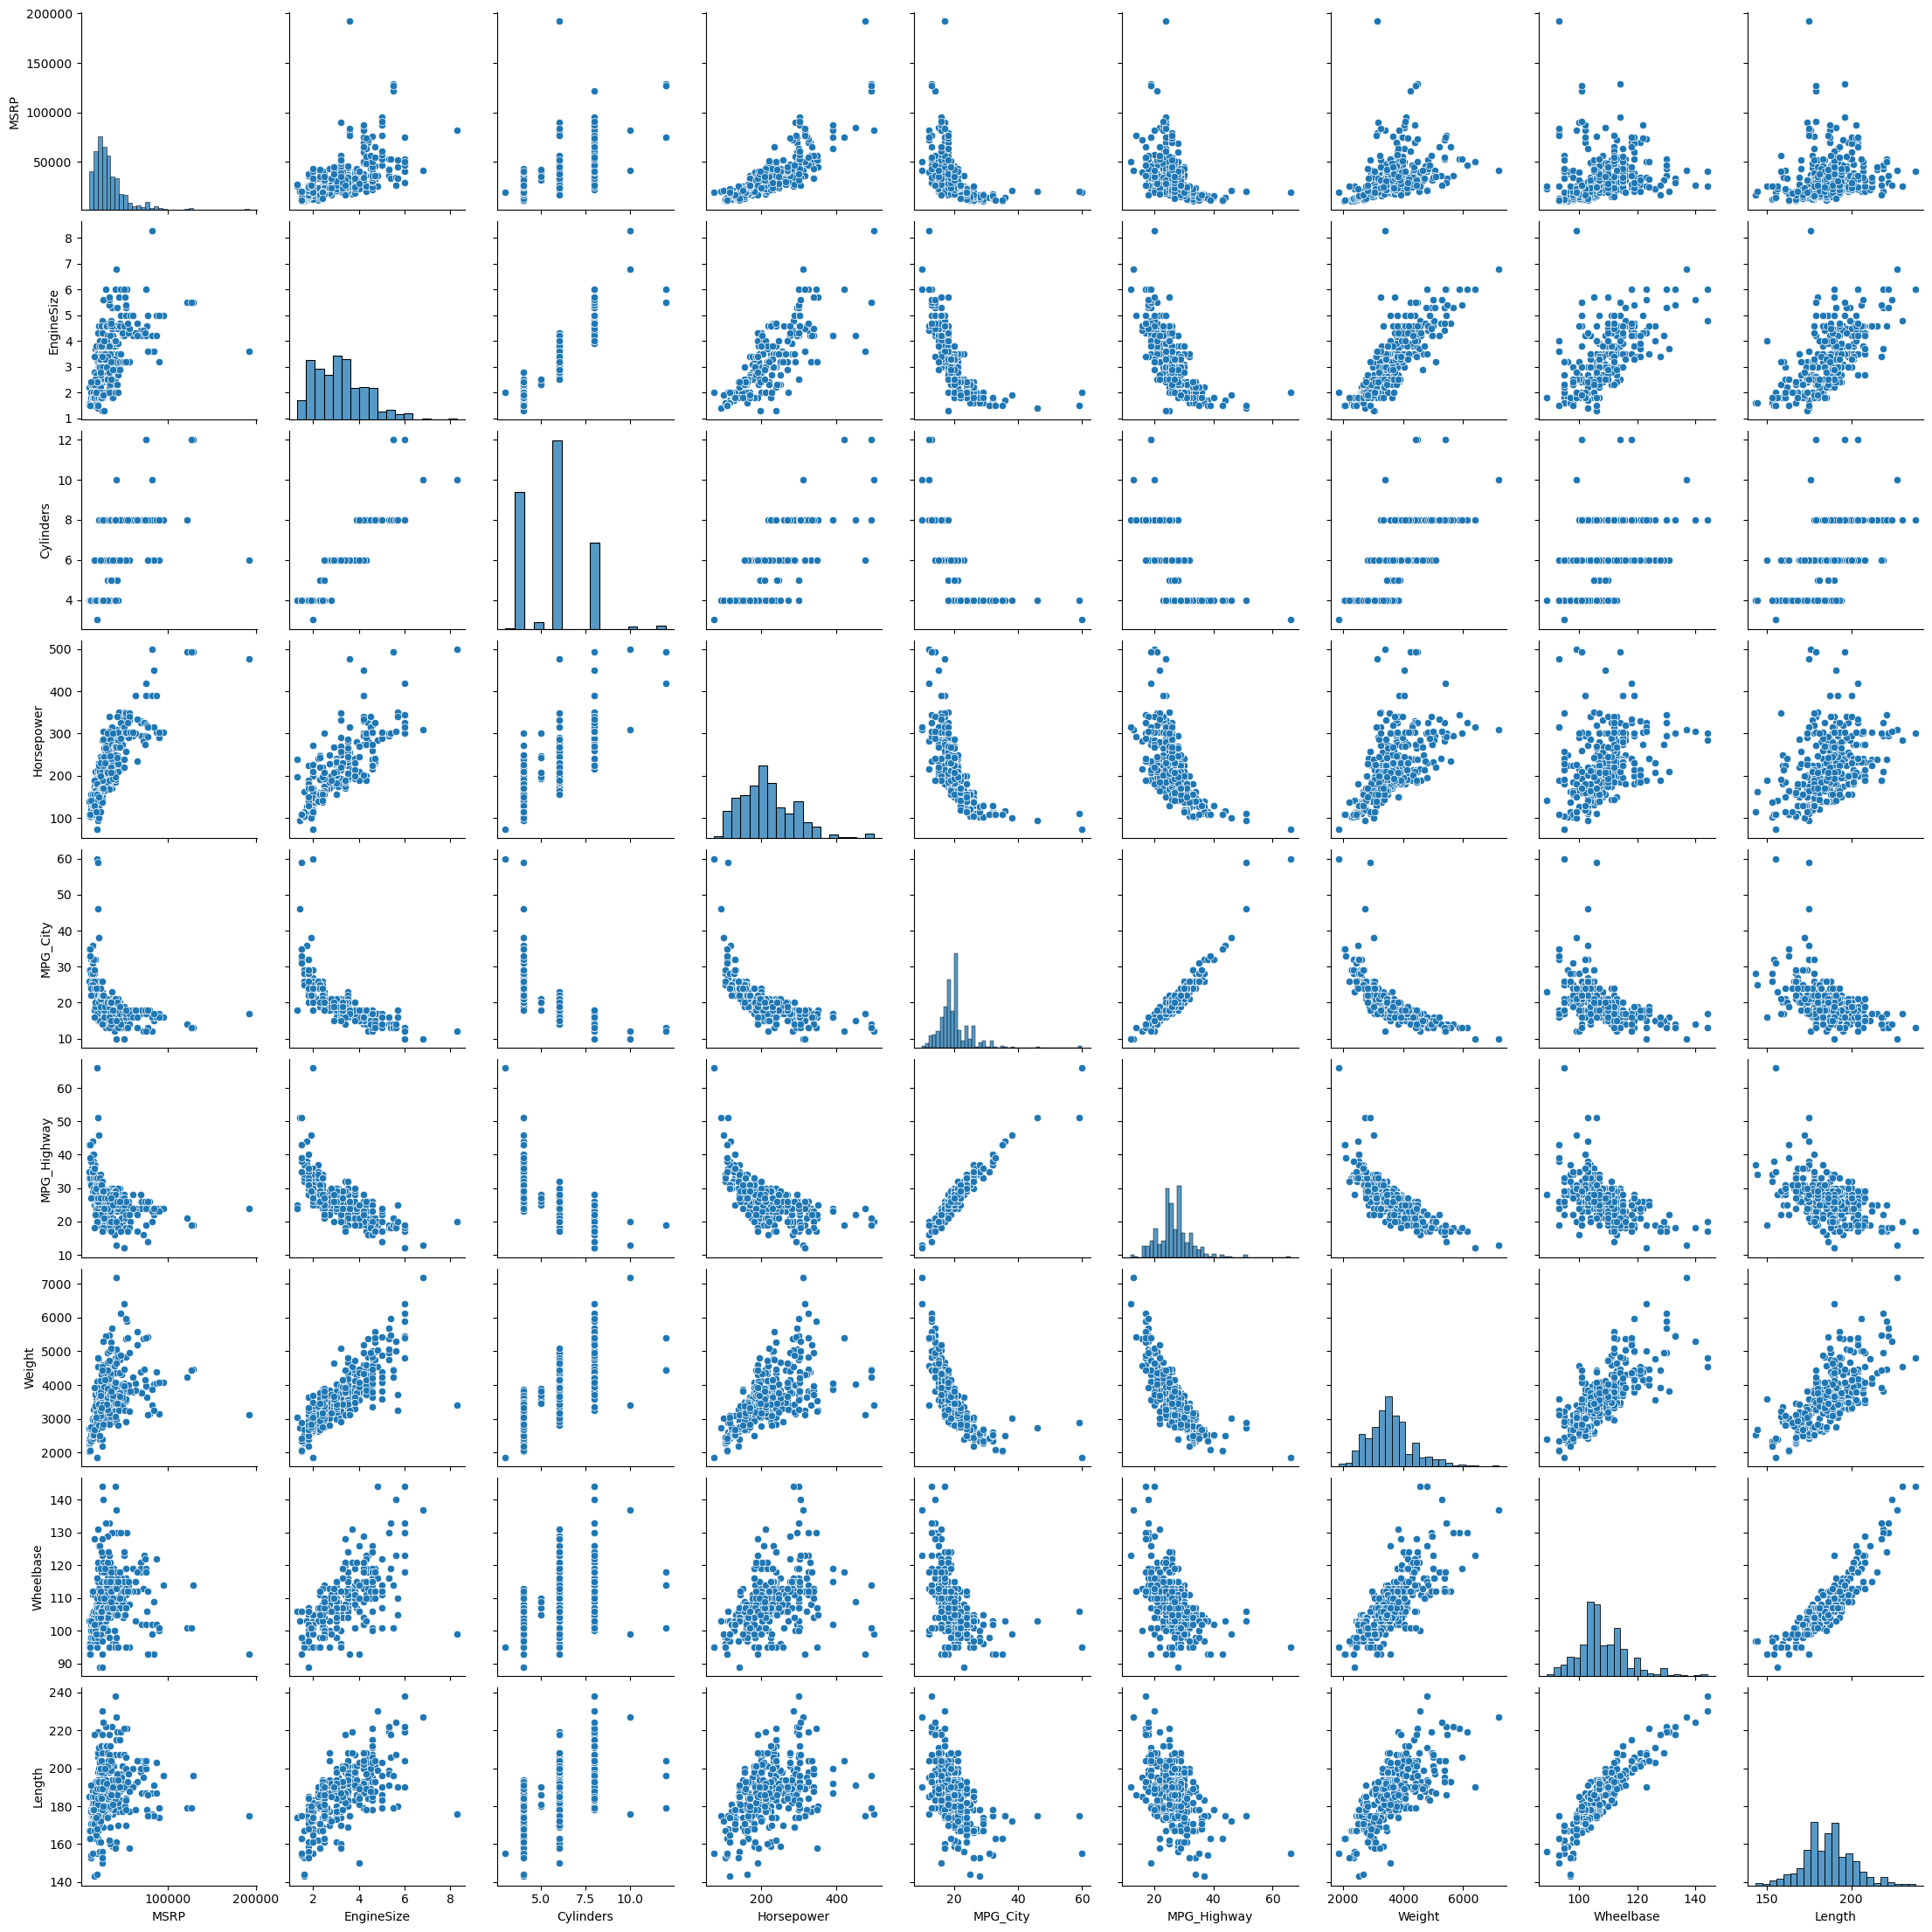

In [20]:
# scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(car_df) 


In [21]:
# Let's view various makes of the cars
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

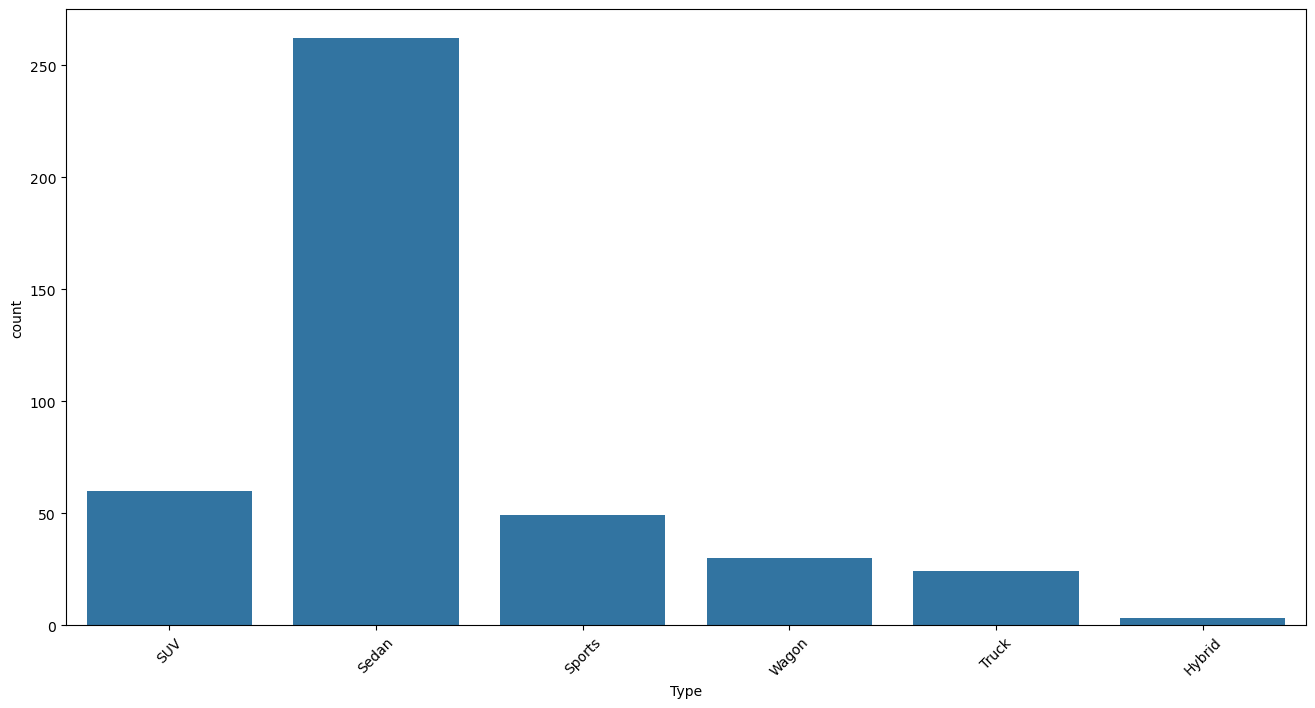

In [22]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Type'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);

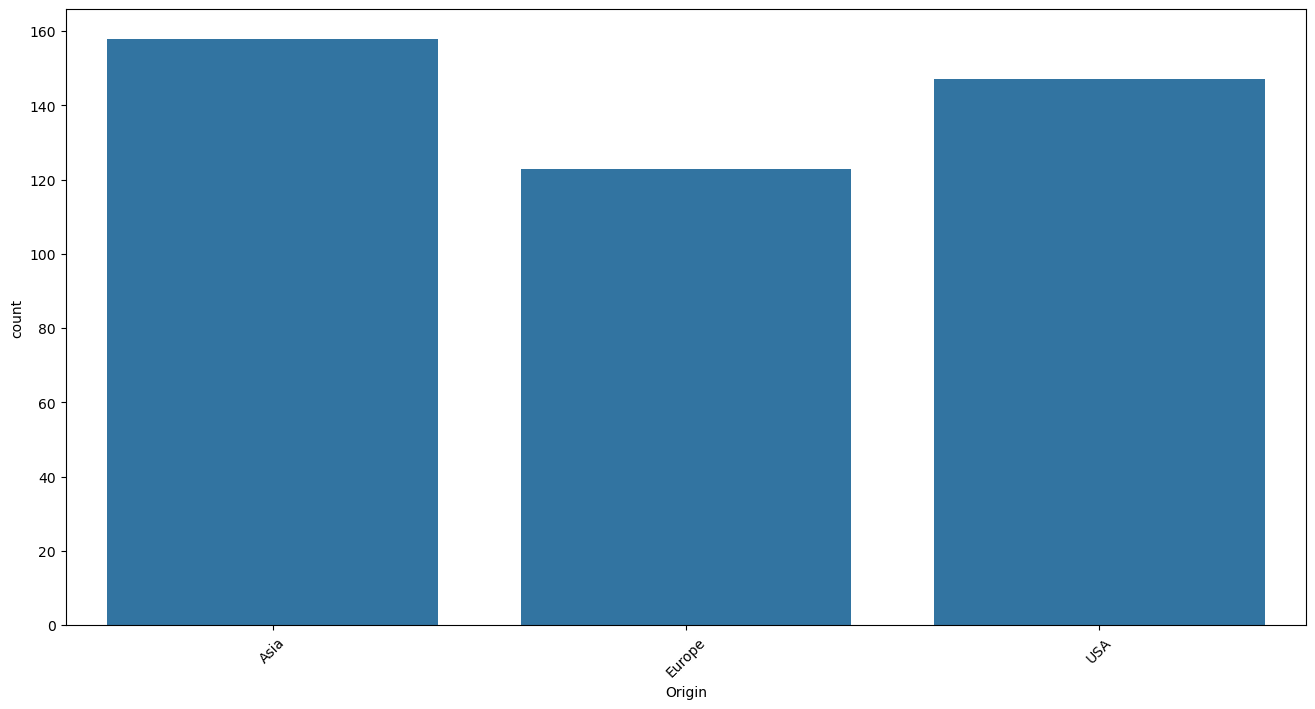

In [23]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Origin'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);

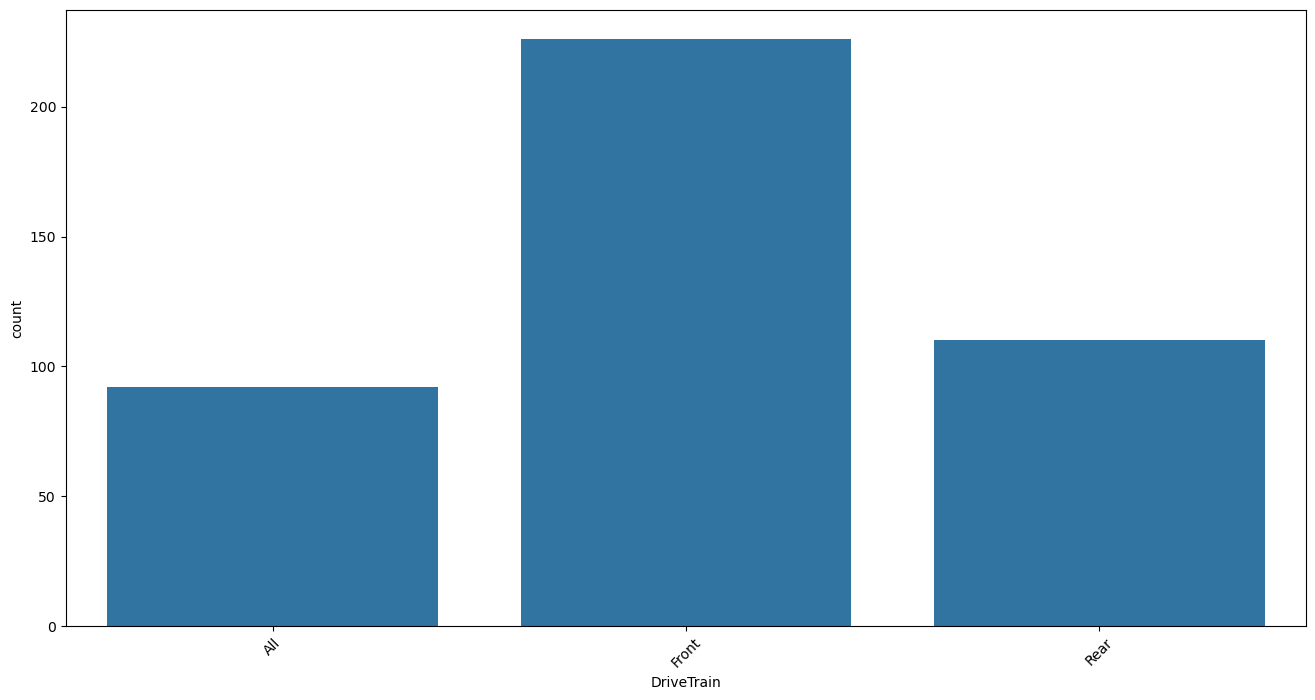

In [24]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['DriveTrain'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);

In [25]:
!pip install wordcloud
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

  Using cached wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (548 kB)


In [26]:
car_df

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180


In [27]:
text = car_df.Model.values

In [28]:
stopwords = set(STOPWORDS)

In [29]:
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))  

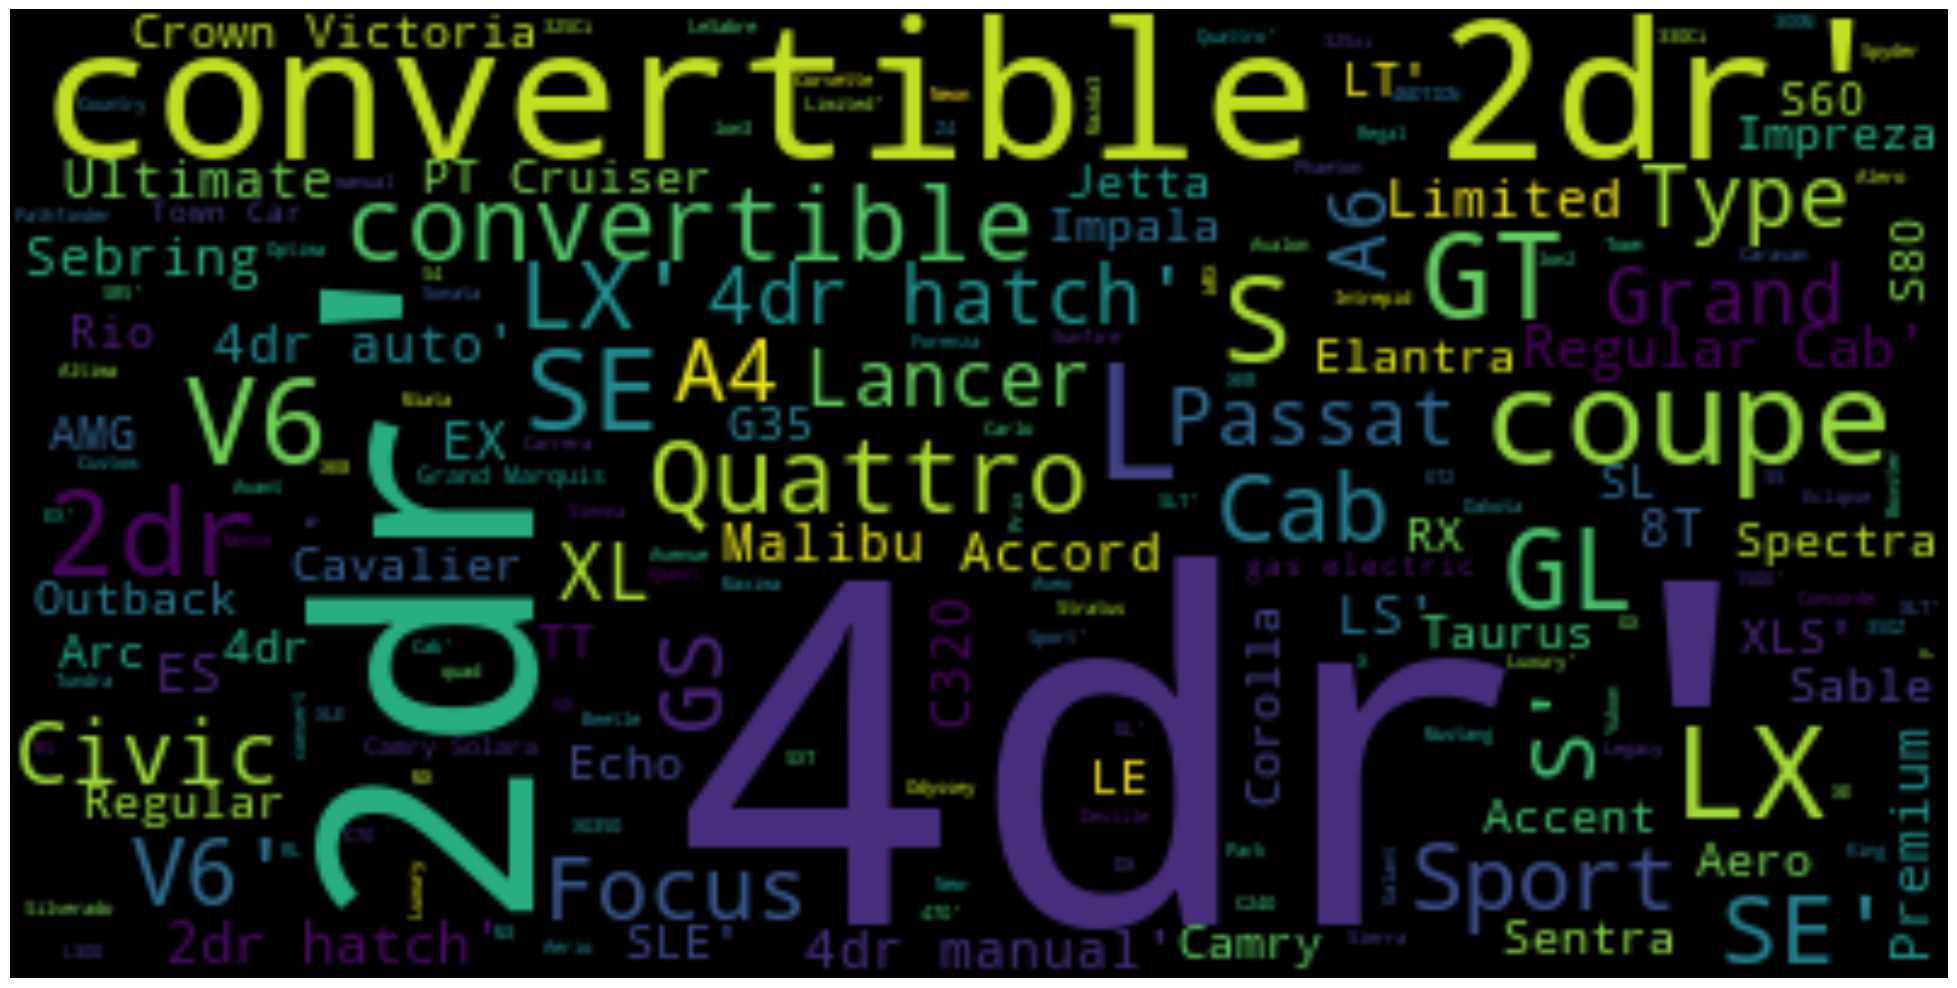

In [30]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [31]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
car_df = pd.get_dummies(car_df, columns=["Make", "Model", "Type", "Origin", "DriveTrain"])

In [32]:
car_df.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6,265,17,23,4451,106,189,True,...,False,False,False,False,True,False,False,True,False,False
1,23820,2.0,4,200,24,31,2778,101,172,True,...,True,False,False,False,True,False,False,False,True,False
2,26990,2.4,4,200,22,29,3230,105,183,True,...,True,False,False,False,True,False,False,False,True,False
3,33195,3.2,6,270,20,28,3575,108,186,True,...,True,False,False,False,True,False,False,False,True,False
4,43755,3.5,6,225,18,24,3880,115,197,True,...,True,False,False,False,True,False,False,False,True,False


###Declare features and target variable

In [33]:
# Feeding input features to X and output (MSRP) to y
X = car_df.drop("MSRP", axis = 1)
y = car_df["MSRP"]

In [34]:
X = np.array(X)

In [35]:
y = np.array(y)

# TASK #3: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER TO SOLVE MULTIPLE LINEAR REGRESSION PROBLEM

In [38]:
# Convert the datatype to float32 (to run Linear Learner successfully)
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [39]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

# Let's define the S3 bucket and prefix that we want to use in this session
# bucket = 'aws-ml-10days' # bucket named 'aws-ml-10days' was created beforehand
#bucket = aws-practice-2024 
bucket = sagemaker_session.default_bucket() 
#aws-practice-2024
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
arn:aws:iam::213950924470:role/service-role/AmazonSageMaker-ExecutionRole-20240522T185225


In [40]:
X_train.shape

(342, 483)

In [41]:
y_train.shape

(342,)

In [42]:
# y_train = y_train[:,0]

In [43]:
# y_train.shape

In [44]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [45]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-213950924470/linear_learner/train/linear-train-data


In [46]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-213950924470/linear_learner/output


In [47]:
# Note that this code leverages the new SageMaker SDK 2.0
# Check this for the list of changes from AWS SageMaker SDK 1.0 to 2.0: https://sagemaker.readthedocs.io/en/stable/v2.html

# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session
container = sagemaker.image_uris.retrieve("linear-learner", boto3.Session().region_name)


# This is using the old AWS SageMAker SDK 1.0 (You need to use get_image_uri and note that attribute order is different as well)
# from sagemaker.amazon.amazon_estimator import get_image_uri
# container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [48]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 483,
                           predictor_type = 'regressor',
                           mini_batch_size = 10,
                           epochs = 10,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs
# Also Make sure to see the model accuracy metrics.

INFO:sagemaker:Creating training-job with name: linear-learner-2024-10-24-02-18-08-311


2024-10-24 02:18:09 Starting - Starting the training job...
2024-10-24 02:18:24 Starting - Preparing the instances for training...
2024-10-24 02:18:55 Downloading - Downloading input data...
2024-10-24 02:19:20 Downloading - Downloading the training image.........
2024-10-24 02:21:01 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/24/2024 02:21:25 INFO 139762637530944] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss

# TASK #4: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [49]:
# Deploying the model to perform inference 

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.
# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type
# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer


linear_regressor = linear.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge',
                                 serializer=CSVSerializer(),
                                 deserializer=JSONDeserializer())

INFO:sagemaker:Creating model with name: linear-learner-2024-10-24-02-22-26-538
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-10-24-02-22-26-538
INFO:sagemaker:Creating endpoint with name linear-learner-2024-10-24-02-22-26-538


----------!

In [50]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [51]:
result # results are in Json format

{'predictions': [{'score': 45833.43359375},
  {'score': 20190.59765625},
  {'score': 23368.8359375},
  {'score': 35919.6171875},
  {'score': 12695.296875},
  {'score': 42630.4140625},
  {'score': 34165.109375},
  {'score': 32709.244140625},
  {'score': 54354.1875},
  {'score': 54285.296875},
  {'score': 45590.45703125},
  {'score': 13796.0078125},
  {'score': 22716.32421875},
  {'score': 37248.0703125},
  {'score': 29740.66015625},
  {'score': 27814.921875},
  {'score': 69197.890625},
  {'score': 19275.71484375},
  {'score': 25401.544921875},
  {'score': 13831.23046875},
  {'score': 30794.609375},
  {'score': 53260.1171875},
  {'score': 33020.72265625},
  {'score': 41754.078125},
  {'score': 29679.546875},
  {'score': 28225.32421875},
  {'score': 51392.38671875},
  {'score': 23793.203125},
  {'score': 12450.544921875},
  {'score': 18544.890625},
  {'score': 41547.3515625},
  {'score': 30631.22265625},
  {'score': 74607.546875},
  {'score': 54093.29296875},
  {'score': 56433.015625},
  

In [52]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [53]:
predictions

array([45833.43359375, 20190.59765625, 23368.8359375 , 35919.6171875 ,
       12695.296875  , 42630.4140625 , 34165.109375  , 32709.24414062,
       54354.1875    , 54285.296875  , 45590.45703125, 13796.0078125 ,
       22716.32421875, 37248.0703125 , 29740.66015625, 27814.921875  ,
       69197.890625  , 19275.71484375, 25401.54492188, 13831.23046875,
       30794.609375  , 53260.1171875 , 33020.72265625, 41754.078125  ,
       29679.546875  , 28225.32421875, 51392.38671875, 23793.203125  ,
       12450.54492188, 18544.890625  , 41547.3515625 , 30631.22265625,
       74607.546875  , 54093.29296875, 56433.015625  , 21265.37890625,
       35165.09765625, 14202.5234375 , 17209.7578125 , 15232.05078125,
       19343.5234375 , 33898.21484375, 61290.3359375 , 74331.625     ,
       27400.43164062, 17185.1796875 , 23737.19921875, 42649.046875  ,
       20840.05664062, 21033.8125    , 50690.15625   , 20687.84960938,
       40173.45703125, 36848.0078125 , 16237.56835938, 23176.53710938,
      

In [54]:
predictions.shape

(86,)

In [55]:
y_test.shape

(86,)

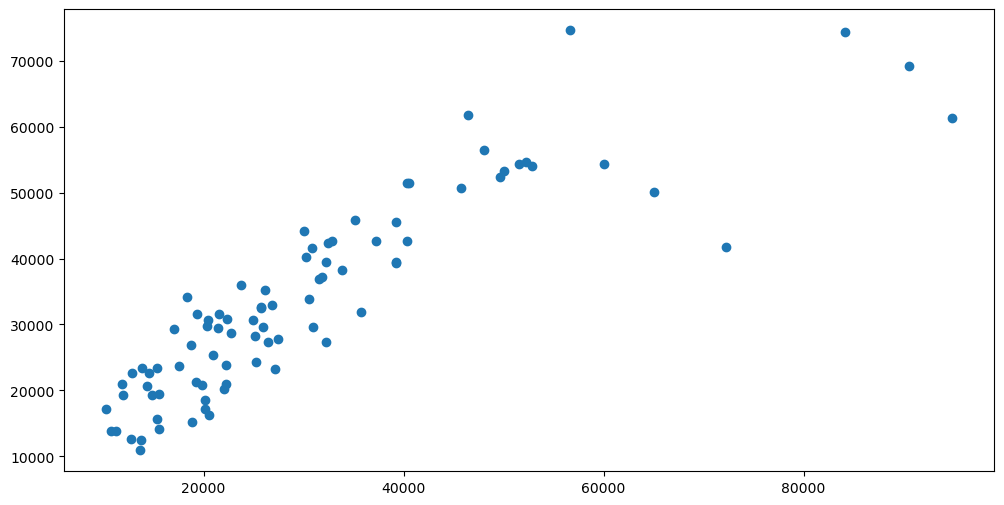

In [56]:
# Visualize how accurate predictions are relative to y_test
plt.figure(figsize = (12, 6))
plt.scatter(y_test, predictions)

In [57]:
# Delete the end-point

linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-10-24-02-22-26-538
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-10-24-02-22-26-538


# TASK #4: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL  
- **Retrain the linear learner model using a different loss function. Set the learning_rate hyperparameter to a large number (any reasonable answer should be sufficient)** 
- **Report any improvement or degradation in model performance (R2)**

In [58]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 483,
                           predictor_type = 'regressor',
                           mini_batch_size = 10,
                           epochs = 10,
                           num_models = 32,
                           learning_rate = 6,
                           loss = 'squared_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

INFO:sagemaker:Creating training-job with name: linear-learner-2024-10-24-02-28-00-116


2024-10-24 02:28:01 Starting - Starting the training job...
2024-10-24 02:28:15 Starting - Preparing the instances for training...
2024-10-24 02:28:42 Downloading - Downloading input data...
2024-10-24 02:29:07 Downloading - Downloading the training image......
2024-10-24 02:30:23 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/24/2024 02:30:46 INFO 139676566447936] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 